<a href="https://colab.research.google.com/github/ashikhaj/PhoneDirectory/blob/main/magic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [ ]:
cols=["flength","fwidth","fsize","fcone","fconel","faaya","fm3long","fm3train","falpha","fdiat","class"]
df=pd.read_csv("magic04[1].data",names=cols)
df.head()

,flength,fwidth,fsize,fcone,fconel,faaya,fm3long,fm3train,falpha,fdiat,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [ ]:
df["class"]=(df["class"]=="g").astype(int)

In [ ]:
df.head()

,flength,fwidth,fsize,fcone,fconel,faaya,fm3long,fm3train,falpha,fdiat,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


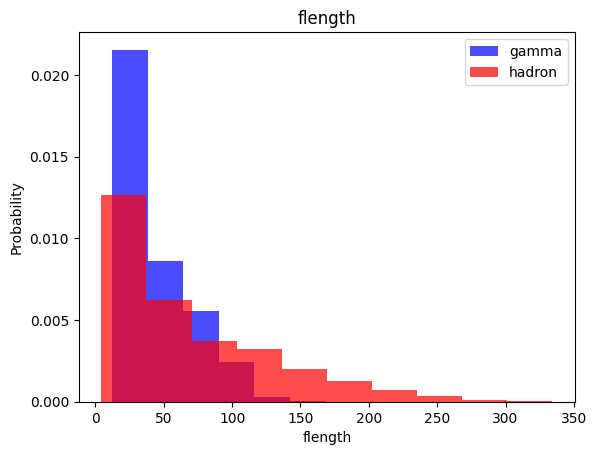

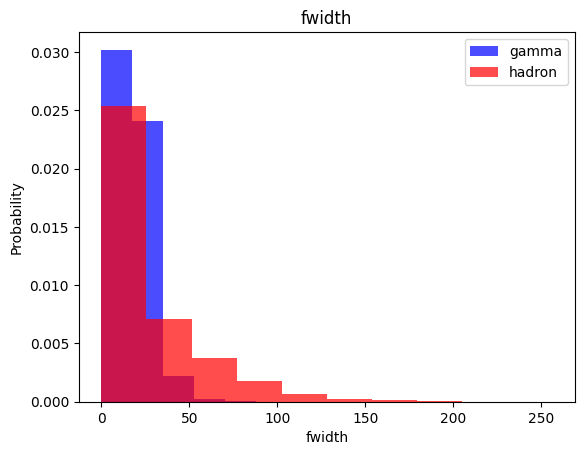

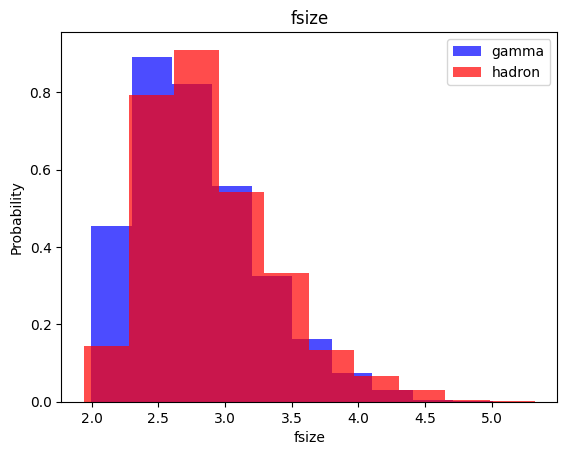

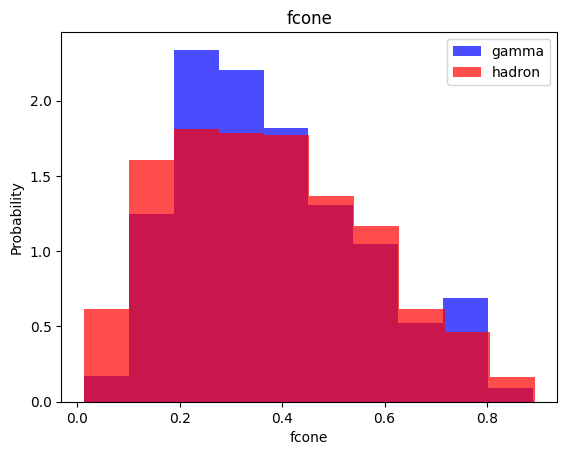

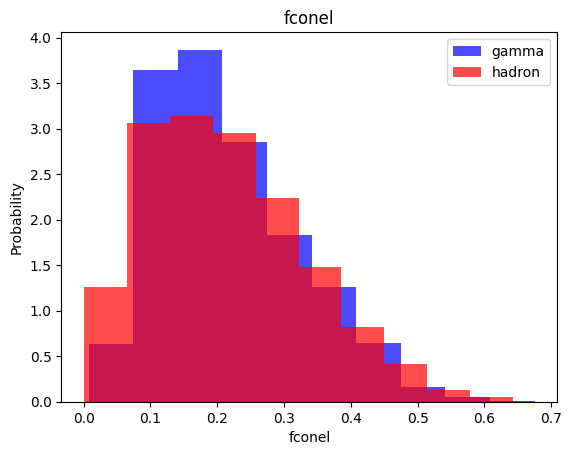

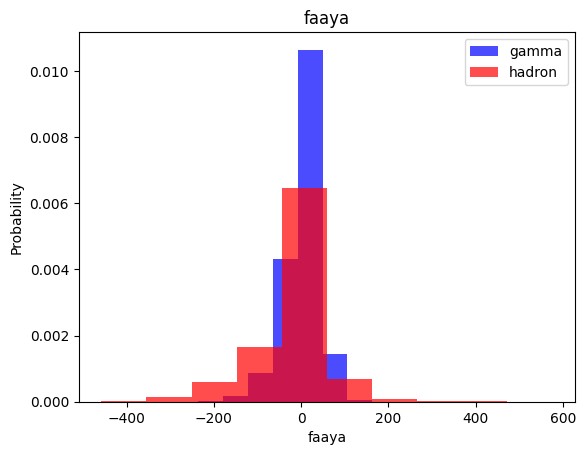

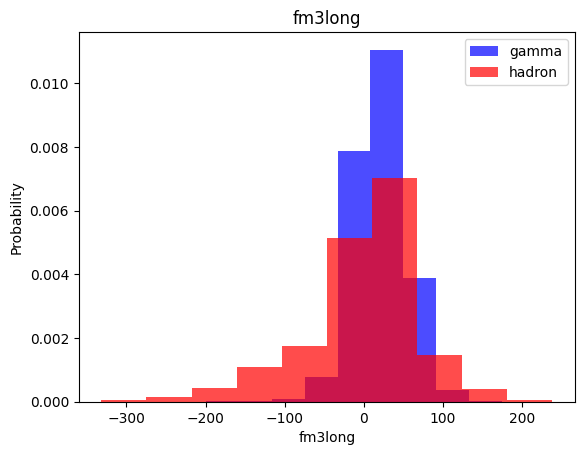

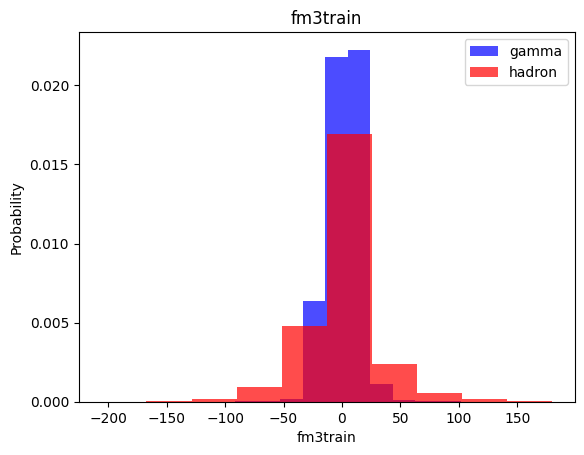

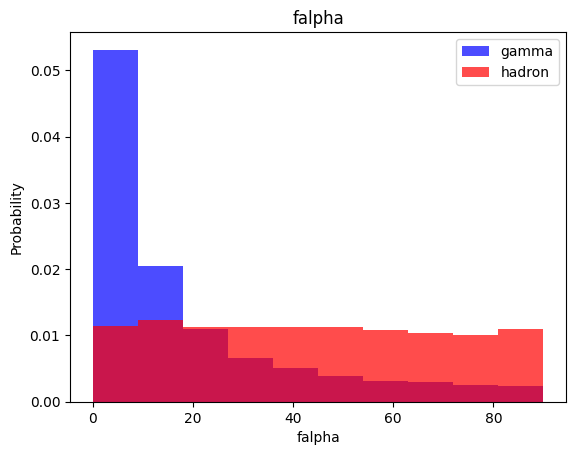

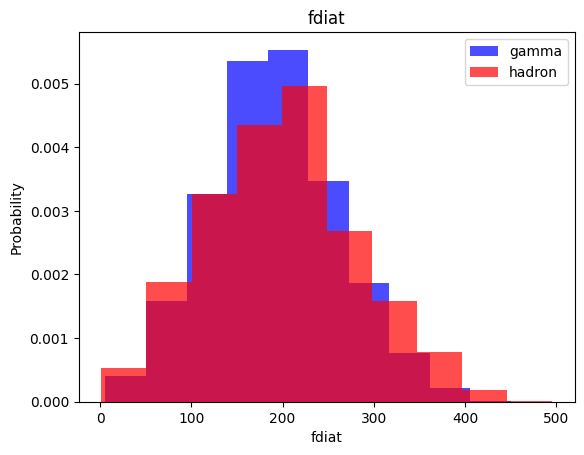

In [ ]:
for label in cols[:-1]:
    plt.hist(df[df["class"]==1][label],color="blue",label="gamma",alpha=0.7,density=True)
    plt.hist(df[df["class"]==0][label],color="red",label="hadron",alpha=0.7,density=True)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()




In [ ]:
train,valid,test=np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])

In [ ]:
def scale_dataset(dataframe,oversample=False):
  x=dataframe[dataframe.columns[:-1]].values
  y=dataframe[dataframe.columns[-1]].values
  scaler=StandardScaler()
  x=scaler.fit_transform(x)
  if oversample:
    ros=RandomOverSampler()
    x,y=ros.fit_resample(x,y)
  data=np.hstack((x,np.reshape(y,(-1,1))))
  return data, x, y

In [ ]:
train, x_train, y_train=scale_dataset(train,oversample=True)

In [ ]:
scale_dataset(train,oversample=True)

AttributeError: ignored

In [ ]:

len(y_train)

14822

In [ ]:
sum(y_train==1)

7360

In [ ]:
sum(y_train==0)

7360

In [ ]:
train, x_train, y_train=scale_dataset(train, oversample=True)
valid, x_valid, y_valid=scale_dataset(valid, oversample=False)
test, x_test, y_test=scale_dataset(test, oversample=False)

AttributeError: ignored

In [ ]:
print(len(train[train["class"]==1]))
print(len(train[train["class"]==0]))

7360
4052


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_model=KNeighborsClassifier(n_neighbors=1)
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
y_pred=knn_model.predict(x_test)
y_pred

NameError: ignored